# Analysing Oscar academy awards data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

## Part 1)

In [2]:
#read the data into pandas frame
allawards = pd.read_excel("Academy awards dataset (oscars).xlsx")  #this dataset contains all nominations and winners for all categories 
#see the head of data
allawards.head()

,year_film,year_ceremony,ceremony,Category,gender,name,Race,film,winner
0,1927,1928,1,Best Actor,Male,Emil Jannings,White,The Last Command,True
1,1927,1928,1,Best Actress,Female,Janet Gaynor,White,7th Heaven,True
2,1928,1929,2,Best Actor,Male,Warner Baxter,White,In Old Arizona,True
3,1928,1929,2,Best Actress,Female,Mary Pickford,White,Coquette,True
4,1929,1930,3,Best Actor,Male,George Arliss,White,Disraeli,True


In [3]:
allawards.gender.replace('f','F', regex=True, inplace=True)

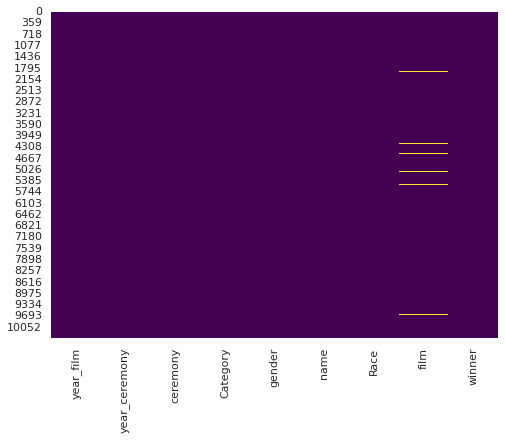

In [4]:
#find lack of data
plt.figure(figsize=(8,6))
#plot the data to find the Nan
sns.heatmap(allawards.isnull(), cmap = "viridis", cbar = False) #this function change the null data to true
plt.show()

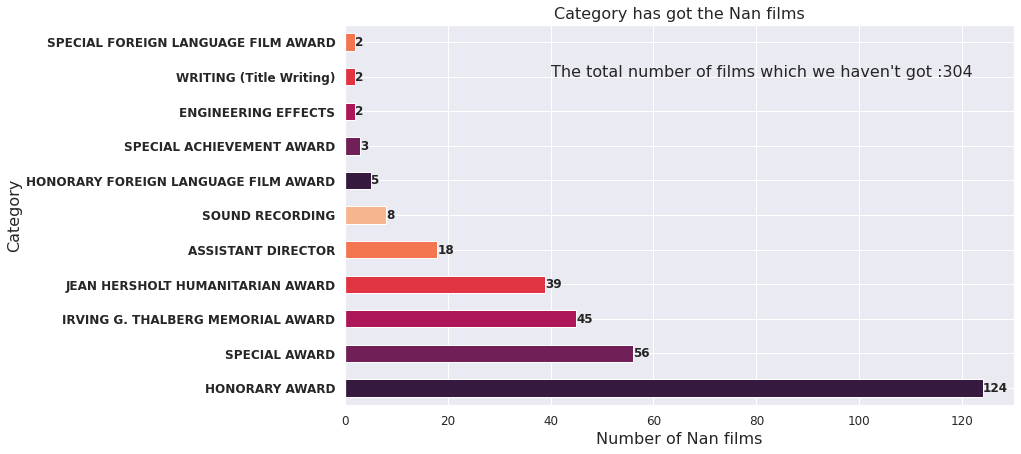

In [5]:
Category = allawards[allawards.film.isnull() == True].Category.value_counts()

#label the number in the plot
for i,value in enumerate(Category):
    plt.text(value, i, str(value), horizontalalignment='left', verticalalignment='center', weight='bold', color='#242424', fontsize=12)

#plot the bar graph
Category.plot(kind=('barh'), color = sns.color_palette("rocket") , figsize=(12,7))

#total number of Nan films
plt.text(x = 40, y = 9, s = f"The total number of films which we haven't got :{allawards[allawards.film.isnull() == True].film.size}", fontsize = 16)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12, weight = 'bold')
plt.title('Category has got the Nan films', fontsize = 16)
plt.xlabel("Number of Nan films",fontsize = 16)
plt.ylabel('Category',fontsize = 16)

plt.show()

In [6]:
print("Number of unique Categories :",allawards.Category.nunique())
print("Number of unique films : ",allawards.film.nunique())
print("Number of unique Race : ",allawards.Race.nunique())

Number of unique Categories : 94
Number of unique films :  4834
Number of unique Race :  4


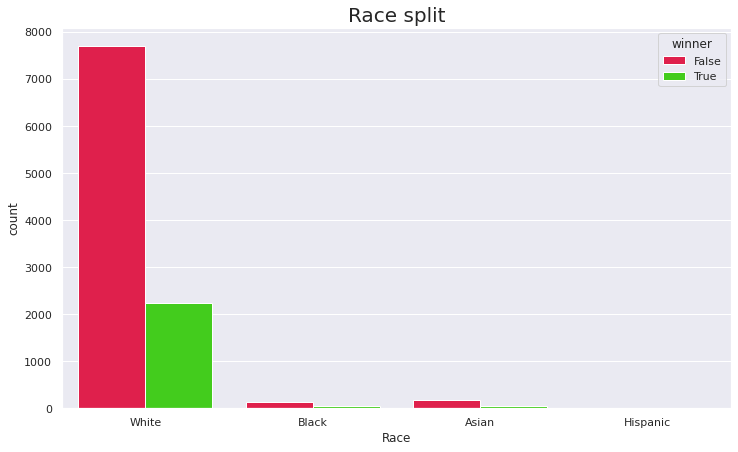

In [7]:
#Race split baes on wins oscar
#plotting the hist graph
plt.figure(figsize=(12,7))
sns.countplot(data = allawards, x = "Race" , hue='winner', palette = "prism_r" )
plt.title("Race split", fontsize=20)
plt.show()

In [8]:
#remove the special awards for men and women
special = ('Best Actor', 'Best Actress', 'Best Actor in supporting role','ACTRESS IN A SUPPORTING ROLE')
data = allawards[allawards.Category != 'Best Actor']
data = data[data.Category != 'Best Actress']
data = data[data.Category != 'Best Actor in supporting role']
data = data[data.Category != 'ACTRESS IN A SUPPORTING ROLE']

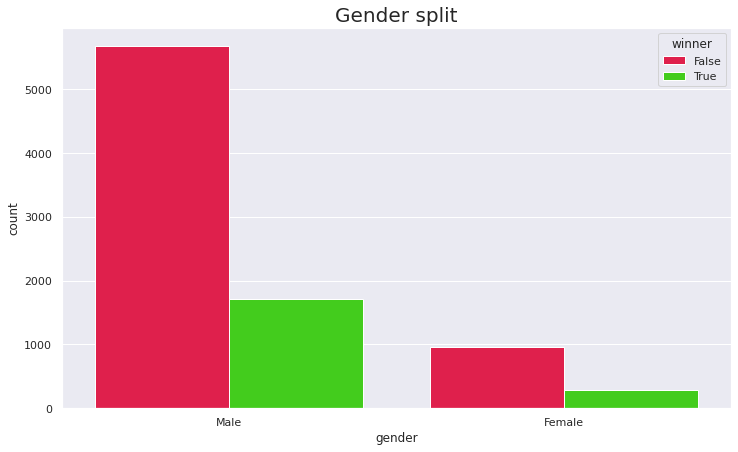

In [9]:
#gender split based on wins oscar
#plotting the hist graph
plt.figure(figsize=(12,7))
sns.countplot(data = data, x = "gender" , hue='winner', palette = "prism_r" )
plt.title("Gender split", fontsize=20)
plt.show()

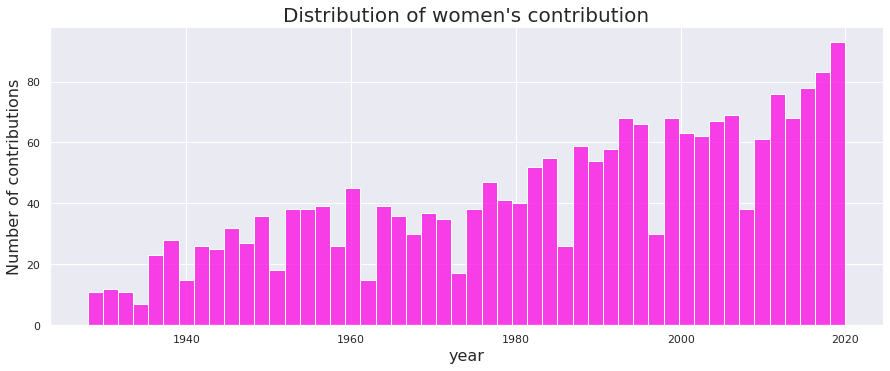

In [10]:
#distribution of women's contribution
female = allawards[allawards.gender == 'Female']

#plotting distribution
sns.displot(female.year_ceremony, bins=50, kde=False, height=5, aspect=2.5, color='#fc03e3')

plt.title("Distribution of women's contribution", fontsize=20)
plt.xlabel('year', fontsize=16)
plt.ylabel('Number of contributions', fontsize=16)
plt.show()

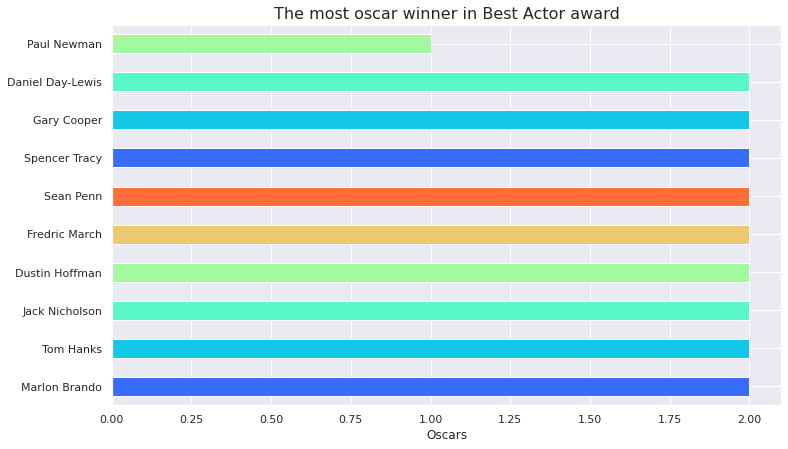

In [11]:
#more than 1 oscar winner in Best Actor
actor = allawards[allawards.Category== "Best Actor"][allawards.winner == True].name.value_counts()[:10]

actor.plot(kind=('barh'), color = sns.color_palette("rainbow") , figsize=(12,7))

plt.title("The most oscar winner in Best Actor award", fontsize= 16)
plt.xlabel("Oscars")
plt.show()

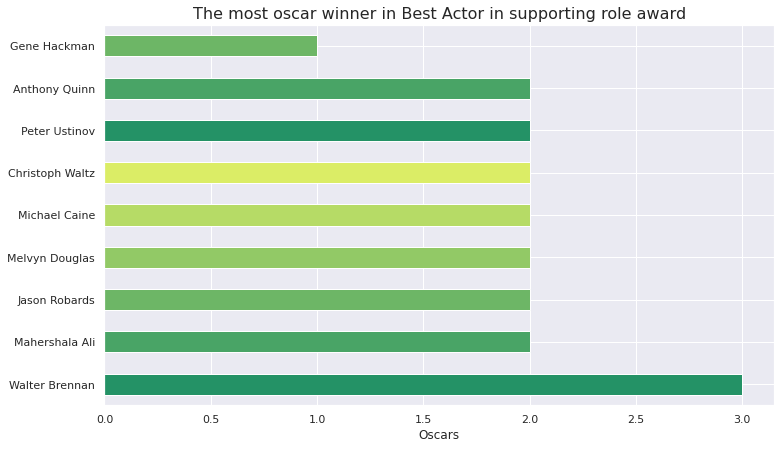

In [12]:
#more than 1 oscar winner in Best Actor in supporting role
actor = allawards[allawards.Category== "Best Actor in supporting role"][allawards.winner == True].name.value_counts()[:9]

actor.plot(kind=('barh'), color = sns.color_palette("summer") , figsize=(12,7))

plt.title("The most oscar winner in Best Actor in supporting role award", fontsize= 16)
plt.xlabel("Oscars")
plt.show()

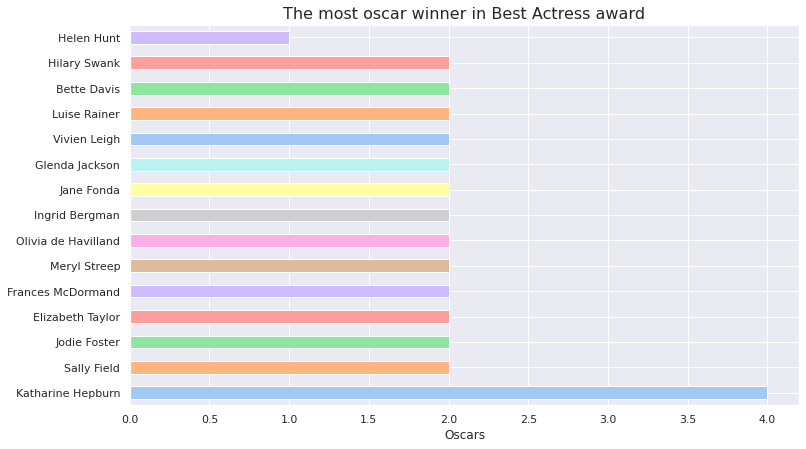

In [13]:
#more than 1 oscar winner in Best Actress
actress = allawards[allawards.Category== "Best Actress"][allawards.winner == True].name.value_counts()[:15]

actress.plot(kind=('barh'), color = sns.color_palette("pastel") , figsize=(12,7))

plt.title("The most oscar winner in Best Actress award", fontsize= 16)
plt.xlabel("Oscars")
plt.show()

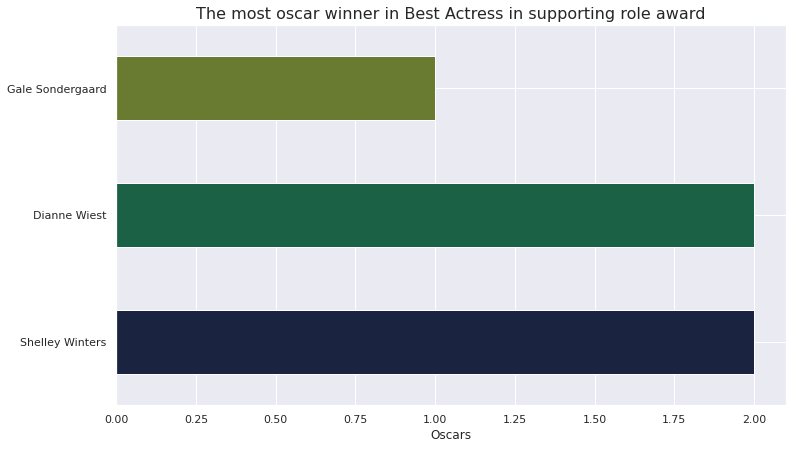

In [14]:
#more than 1 oscar winner in Best Actress in supporting role
actress = allawards[allawards.Category== "ACTRESS IN A SUPPORTING ROLE"][allawards.winner == True].name.value_counts()[:3]

actress.plot(kind=('barh'), color = sns.color_palette("cubehelix") , figsize=(12,7))

plt.title("The most oscar winner in Best Actress in supporting role award", fontsize= 16)
plt.xlabel("Oscars")
plt.show()

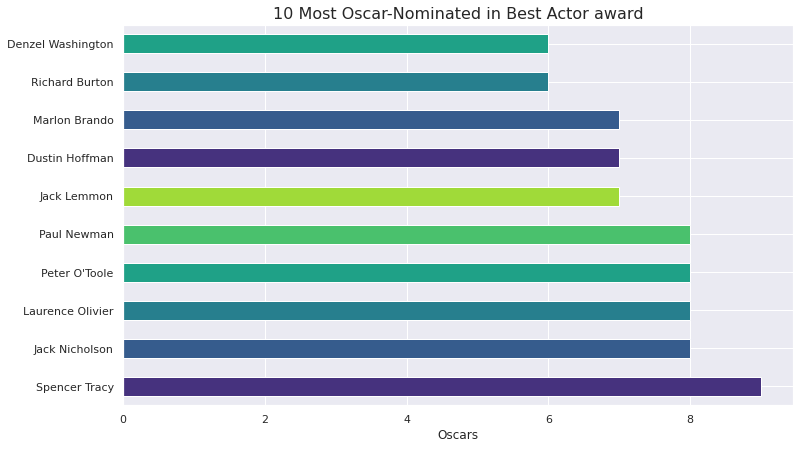

In [15]:
#more than 1 oscar nominated
actor = allawards[allawards.Category== "Best Actor"].name.value_counts()[:10]

actor.plot(kind=('barh'), color = sns.color_palette("viridis") , figsize=(12,7))

plt.xlabel("Oscars")
plt.title("10 Most Oscar-Nominated in Best Actor award", fontsize= 16)
plt.show()

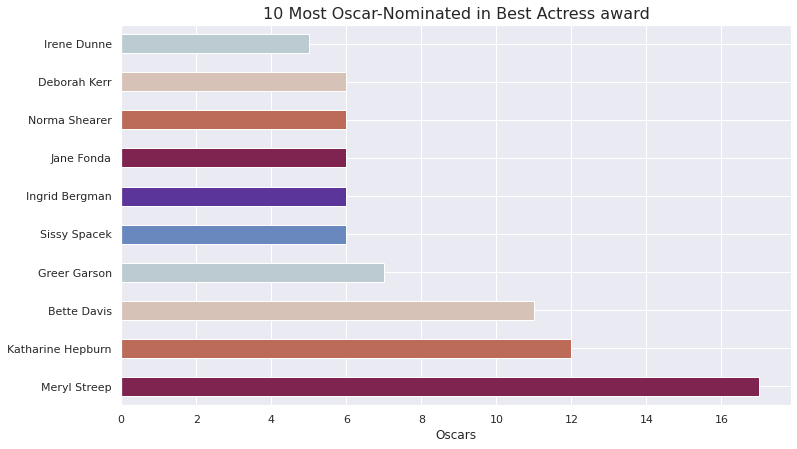

In [16]:
#more than 1 oscar nominated
actress = allawards[allawards.Category== "Best Actress"].name.value_counts()[:10]

actress.plot(kind=('barh'), color = sns.color_palette("twilight_shifted_r") , figsize=(12,7))

plt.title("10 Most Oscar-Nominated in Best Actress award", fontsize= 16)
plt.xlabel("Oscars")
plt.show()

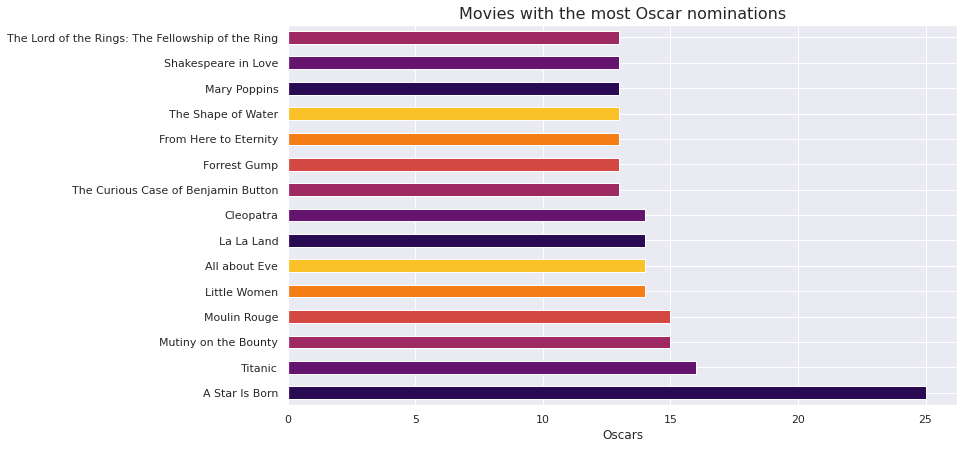

In [17]:
#Movies with the most Oscar nominations
filmdata = allawards.dropna()['film'].value_counts()[:15]
filmdata.plot(kind = 'barh', color = sns.color_palette("inferno") , figsize=(12,7))
plt.title("Movies with the most Oscar nominations", fontsize = 16)
plt.xlabel("Oscars")
plt.show()

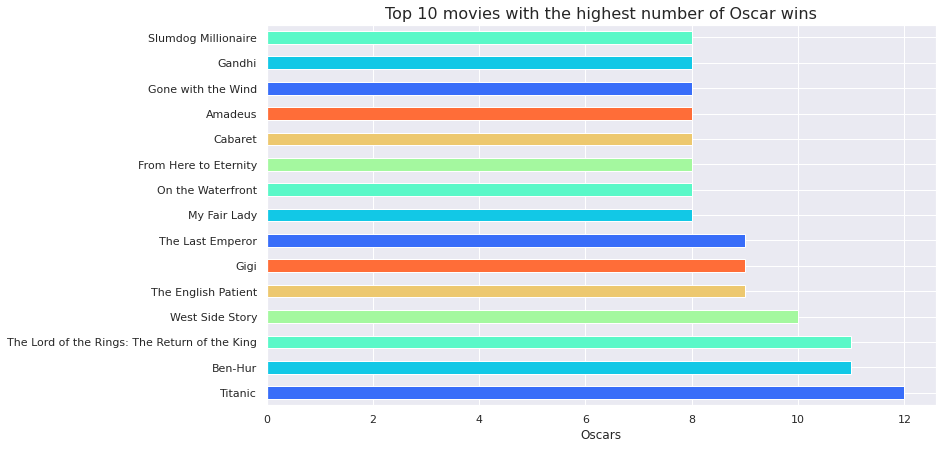

In [18]:
#top 10 movies with the highest number of Oscar wins
film_win = allawards.dropna()[allawards.winner == True]['film'].value_counts()[:15]
film_win.plot(kind = 'barh', color = sns.color_palette("rainbow") , figsize=(12,7))
plt.title("Top 10 movies with the highest number of Oscar wins", fontsize = 16)
plt.xlabel("Oscars")
plt.show()

## Part 2)

In [200]:
#read the data into pandas frame
demo_org = pd.read_csv("Oscars-demographics-DFE.csv",encoding='cp1252')  #this dataset contains demographics of oscar winners
#see the head of data
demo_org.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


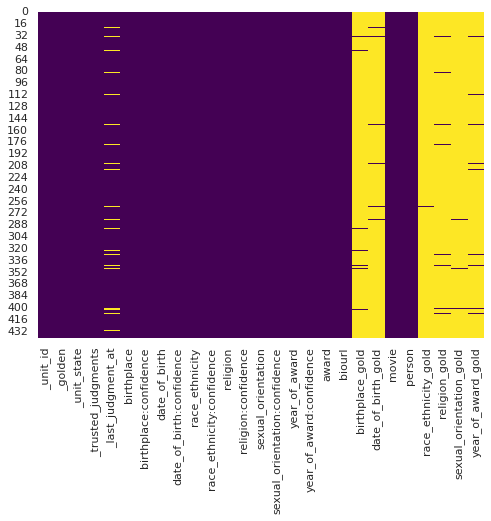

In [201]:
#find lack of data
plt.figure(figsize=(8,6))
#plot the data to find the Nan
sns.heatmap(demo_org.isnull(), cmap = "viridis", cbar = False) #this function change the null data to true
plt.show()

In [202]:
demo_org.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'birthplace', 'birthplace:confidence',
       'date_of_birth', 'date_of_birth:confidence', 'race_ethnicity',
       'race_ethnicity:confidence', 'religion', 'religion:confidence',
       'sexual_orientation', 'sexual_orientation:confidence', 'year_of_award',
       'year_of_award:confidence', 'award', 'biourl', 'birthplace_gold',
       'date_of_birth_gold', 'movie', 'person', 'race_ethnicity_gold',
       'religion_gold', 'sexual_orientation_gold', 'year_of_award_gold'],
      dtype='object')

In [244]:
#select some cols in orginal dataset and work to them
sol = ['birthplace', 'date_of_birth', 'race_ethnicity' ,'religion', 'sexual_orientation', 'year_of_award', 'award', 'movie', 'person']
demo = demo_org[sol]
demo.head()

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
0,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone
1,"Glasgow, Scotland",2-Feb-1886,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd
2,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone
3,"Chicago, Il",23-Feb-1899,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog
4,"Salt Lake City, Ut",23-Apr-1894,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage


In [245]:
#set date of birth into datetime to find year of birth
demo['year_of_birth'] = pd.to_datetime(demo['date_of_birth'], errors='coerce').dt.year

In [246]:
#fix the issue for read year
year = []
for x in demo['year_of_birth']:
    if x > 2000:
        year.append(x - 100)
    else:
        year.append(x)

In [247]:
#creat col for year of birth and age of winners when wins the oscar
demo['year_of_birth'] = year
demo["age"] =  demo['year_of_award'] - demo['year_of_birth']

In [248]:
demo.head()

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age
0,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,1895.0,32.0
1,"Glasgow, Scotland",2-Feb-1886,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd,1886.0,44.0
2,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone,1895.0,36.0
3,"Chicago, Il",23-Feb-1899,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog,1899.0,33.0
4,"Salt Lake City, Ut",23-Apr-1894,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage,1894.0,39.0


In [249]:
print("diffrent of oscar awards in dataset :",demo.award.unique())

diffrent of oscar awards in dataset : ['Best Director' 'Best Actor' 'Best Supporting Actor' 'Best Actress'
 'Best Supporting Actress']


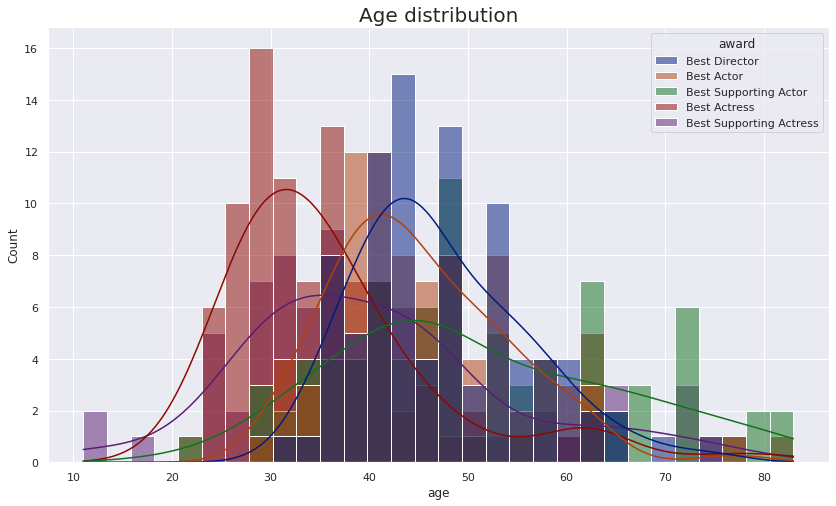

In [280]:
#age dist based on award
plt.figure(figsize=(14,8))
sns.histplot(data = demo, x = "age" , hue='award', palette = "dark" , kde= True, bins= 30)
plt.title("Age distribution", fontsize=20)
plt.show()

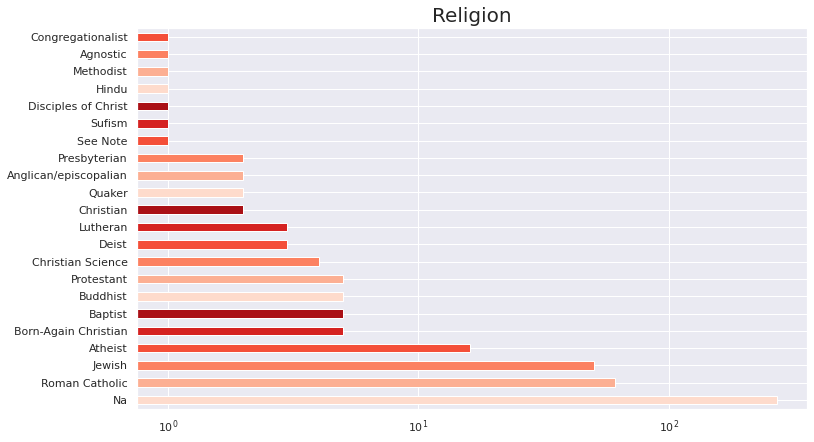

In [278]:
#Religion split baes on academy awards
#plotting the graph
plt.figure(figsize=(12,7))
demo.religion.value_counts().plot(kind = 'barh', color = sns.color_palette("Reds") , figsize=(12,7))
plt.xscale('log')
plt.title("Religion", fontsize=20)
plt.show()

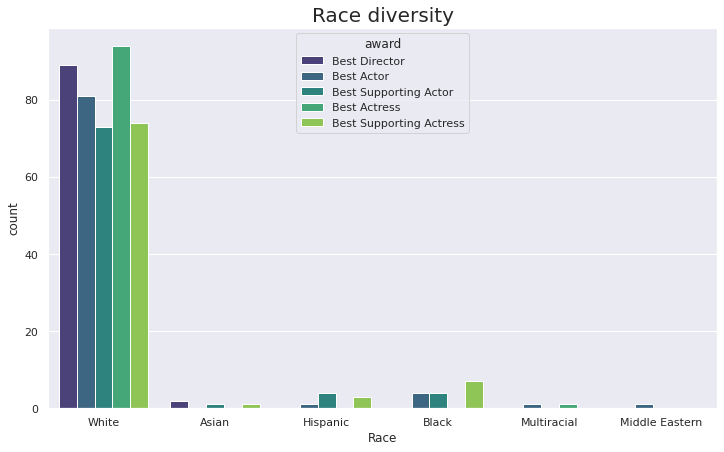

In [279]:
#Race split baes on academy awards
#plotting the graph
plt.figure(figsize=(12,7))
sns.countplot(data = demo, x = "race_ethnicity" , hue='award', palette = "viridis" )
plt.xlabel("Race")
plt.title("Race diversity", fontsize=20)
plt.show()

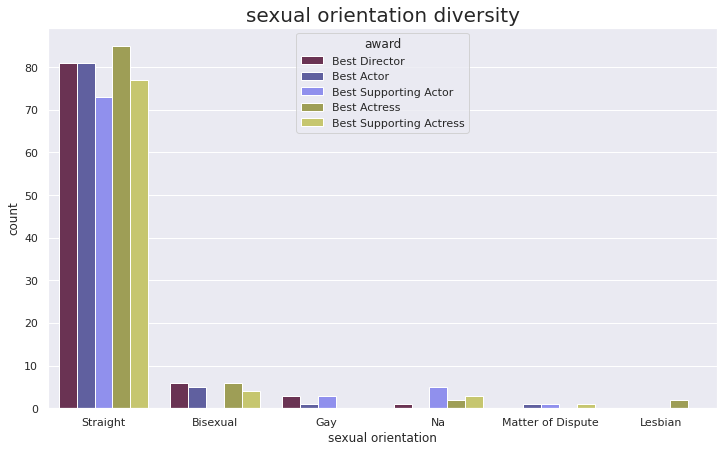

In [277]:
#sexual orientation baes on academy awards
#plotting the graph
plt.figure(figsize=(12,7))
sns.countplot(data = demo, x = "sexual_orientation" , hue='award', palette = "gist_stern" )
plt.xlabel("sexual orientation")
plt.title("sexual orientation diversity", fontsize=20)
plt.show()